In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame({
    'points': [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0, 33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    'assists': [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0, 14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    'rebounds': [15, 14, 10, 8, 14, 13, 9, 5, 4, 11, 6, 5, 3, 8, 12, 7, 6, 5]
})

print(df)

    points  assists  rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5


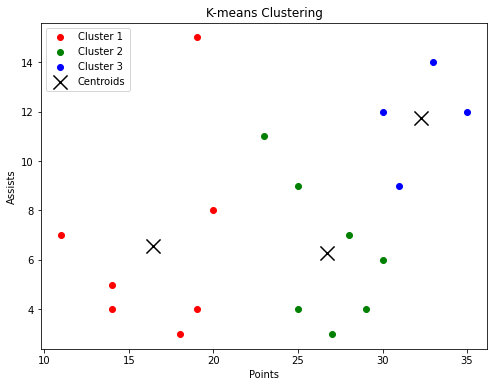

In [14]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means(df, k, num_iterations=100):
    np.random.seed(0)
    centroids = df.sample(k)  # Randomly initialize centroids
    
    for _ in range(num_iterations):
        clusters = []
        for _, row in df.iterrows():
            distances = [euclidean_distance(row[['points', 'assists']], centroid[['points', 'assists']]) for _, centroid in centroids.iterrows()]
            closest_cluster = np.argmin(distances)
            clusters.append(closest_cluster)
        df['cluster'] = clusters

        new_centroids = df.groupby('cluster')[['points', 'assists']].mean()
        
        if centroids.equals(new_centroids):
            break
        
        centroids = new_centroids
    
    return df, centroids

k = 3  # Number of clusters
result, centroids = k_means(df[['points', 'assists']], k)

colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = result[result['cluster'] == i]
    plt.scatter(cluster_points['points'], cluster_points['assists'], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(centroids['points'], centroids['assists'], c='black', marker='x', label='Centroids', s=200)
plt.title('K-means Clustering')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.legend()
plt.show()


In [20]:
#q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Generate or use your own dataset
data = np.array([
    [1, 1],
    [3, 2],
    [9, 1],
    [3, 7],
    [7, 2],
    [9, 7],
    [4, 8],
    [8, 3],
    [1, 4],
])

# a. Plot SSE vs. Number of Clusters
sse_values = []
linkage_methods = ['single', 'complete', 'average', 'ward']

for linkage_method in linkage_methods:
    Z = linkage(data, linkage_method)
    sse = []
    for num_clusters in range(1, len(data) + 1):
        labels = fcluster(Z, t=num_clusters, criterion='maxclust')
        cluster_centers = [np.mean(data[labels == i], axis=0) for i in range(1, num_clusters + 1)]
        sse.append(np.sum([np.sum((data[labels == i] - cluster_centers[i - 1]) ** 2) for i in range(1, num_clusters + 1)]
                        ) / len(data))
    sse_values.append(sse)

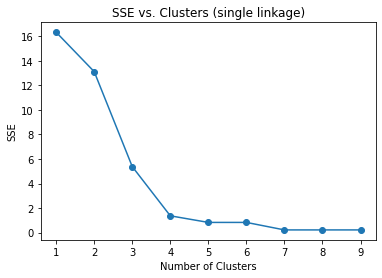

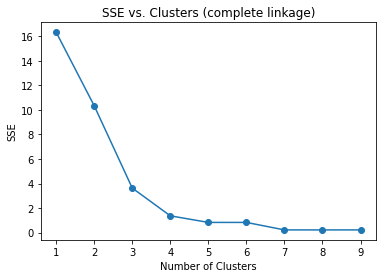

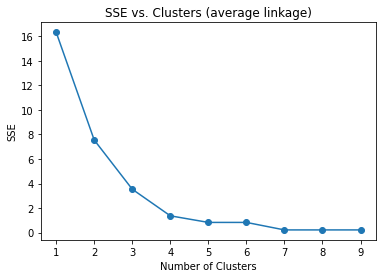

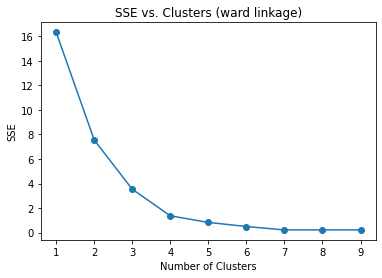

In [17]:
# Plot SSE vs. Number of Clusters
for i, linkage_method in enumerate(linkage_methods):
    plt.plot(range(1, len(data) + 1), sse_values[i], marker='o')
    plt.title(f'SSE vs. Clusters ({linkage_method} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

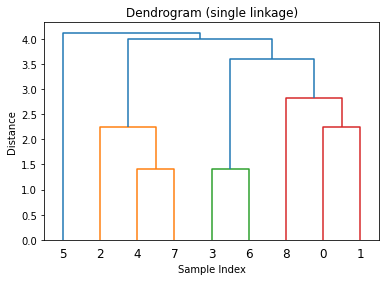

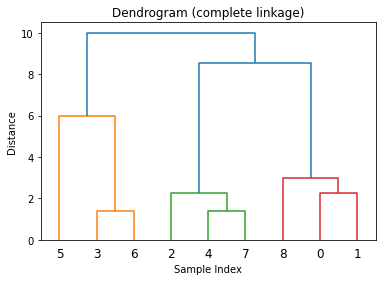

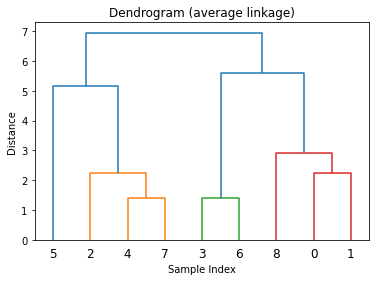

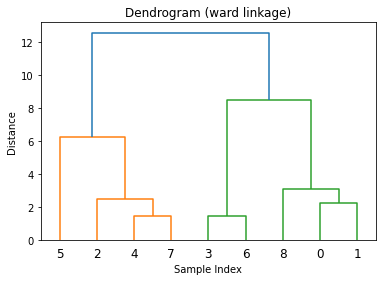

In [21]:
# b. Plot Dendrograms
for i, linkage_method in enumerate(linkage_methods):
    Z = linkage(data, linkage_method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({linkage_method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

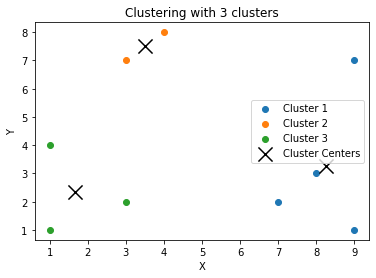

In [22]:
# c. Display clusters along with points
num_clusters = 3  # You can set the number of clusters here
labels = fcluster(Z, t=num_clusters, criterion='maxclust')
cluster_centers = [np.mean(data[labels == i], axis=0) for i in range(1, num_clusters + 1)]

for i in range(1, num_clusters + 1):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], marker='x', s=200, c='k', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Clustering with {num_clusters} clusters')
plt.legend()
plt.show()
